In [139]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [140]:
''' USING Social_Network_Ads.csv as Dataset '''

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
y = np.array([])
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values


<h2>Change Training Data here</h2>

In [168]:
''' Custom '''

X = np.array([[8,0], 
              [0,8], 
              [-8,0], 
              [0,-8],
              [-40,-50],
              [-40,-500],
             ])
y = np.array([1, 
              1,
              -1, 
              -1, 
              -1,
              -1
              ])

d = []
for x in X:
    d.append(np.append(1,x))
D = np.asarray(d)
# D, y

<img src="closed_form.png">

In [169]:
''' Calculating Parameters '''
W = np.matmul(np.matmul(np.linalg.inv(np.matmul(D.transpose(), D)), (D.transpose())), y)
W

array([ 0.07222439,  0.03471951, -0.00062584])

In [170]:
# len(D.reshape((-1, 1)))

0
1


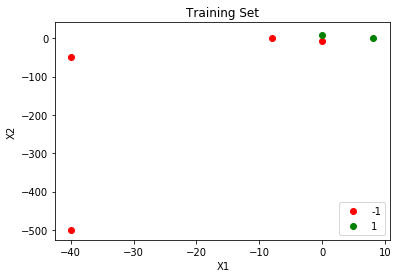

In [171]:
from matplotlib.colors import ListedColormap
X_set, y_set = D[:, 1:], D[:, 2:3]

# print ((X_set), (y_set))
# color= ['red' if l == 1 else 'green' for l in y]
# plt.scatter(X_set, y_set, color=color)

l = ["red", "green"]

for i, j in enumerate(np.unique(y)):
    print (i)
    plt.scatter(X_set[y == j, 0], X_set[y == j, 1],
                c = l[i], label = j)
plt.title('Training Set')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = D[:, 1:], D[:, 2:3]
l = ["red", "green"]

for i, j in enumerate(np.unique(y)):
    plt.scatter(X_set[y == j, 0], X_set[y == j, 1],
                c = l[i], label = j)


X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

x = np.linspace(X1.min(), X1.max())

y = (-W[0] - W[1]*x)/W[2]

plt.plot(x, y)


plt.title('Solution using closed form')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


<h2>Examples</h2>

In [ ]:
'''
Closed form works fine
'''
X = np.array([[0,0], 
              [1,1], 
              [-1,1], 
              [0,2], 
             ])
y = np.array([1, 
              1,
              -1, 
              -1, 
              ])

'''
The error because of the outlier is overshadows all other errors in this case
'''
X = np.array([[8,0], 
              [0,8], 
              [-8,0], 
              [0,-8],
              [-40,-50]
             ])
y = np.array([1, 
              1,
              -1, 
              -1, 
              -1
              ])


X = np.array([[8,0], [0,8], [-8,0], [0,-8],[-40,-50], [-50, -60]])
y = np.array([1, 1, -1, -1, -1, -1])



In [ ]:
def normalEqn(X,y):
    """ 
    Computes the closed-form solution to linear regression
    """
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [ ]:
normalEqn(D, y)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0, random_state = 0)